In [12]:
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import matplotlib.pyplot as plt
import seaborn as sns
# Set the theme and settings for future plots
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 80

In [13]:
date_col = "Date"
# Replace with the file you want to use and load your dataset into a DataFrame
df = pd.read_csv("NVDA.csv", index_col=date_col, parse_dates=True)
# Check that the index is correctly converted to a date
print("The index been parsed as a date: " + str(is_datetime(df.index)))

The index been parsed as a date: True


In [14]:
# Replace this with the name of the column you want to analyze
var_col = "Close"
# Reduce the DataFrame down to the relevant columns
df_subset = df[[var_col]]
# Select the date range you want to explore
df_time = df_subset["2022-1-1":"2023-1-1" ].copy() # Pass in the date ranges you are interested in here
# Preview the DataFrame
df_time

,Close
Date,
2022-03-23,256.339996
2022-03-24,281.500000
2022-03-25,276.920013
2022-03-28,282.190002
2022-03-29,286.559998
...,...
2022-12-23,152.059998
2022-12-27,141.210007
2022-12-28,140.360001


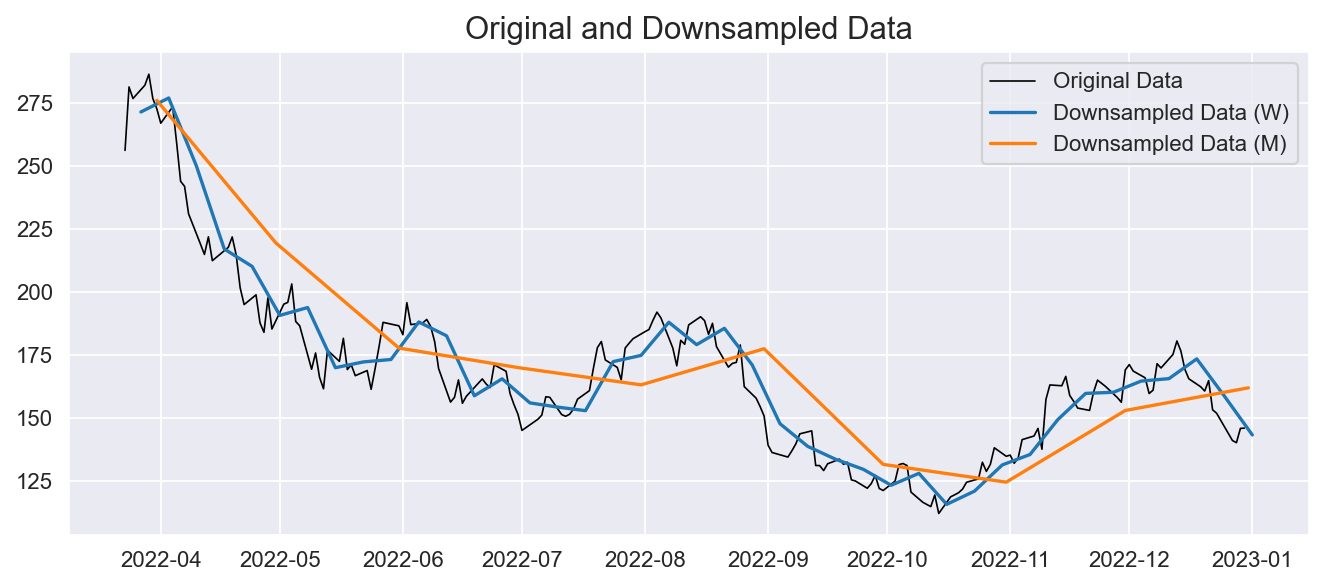

In [15]:
# Set your downsampling periods here
downsample_one = "W"
downsample_two = "M"
# Create a new DataFrame by downsampling with the first downsample period
df_downsample_one = df_time.resample(downsample_one).mean().copy()
# Create a new DataFrame by downsampling with the second downsample period
df_downsample_two = df_time.resample(downsample_two).mean().copy()
# Plot all three DataFrames
plt.plot(
df_time.index,
df_time[var_col],
label="Original Data",
color="black",
linewidth=0.75, )
plt.plot(
df_downsample_one.index,
df_downsample_one[var_col],
label="Downsampled Data " + f"({downsample_one})", )
plt.plot(
df_downsample_two.index,
df_downsample_two[var_col],
label="Downsampled Data " + f"({downsample_two})", )
# Initialize a legend
plt.legend()
# Set the plot title
plt.title("Original and Downsampled Data", fontsize=14)
# Show the plot
plt.show()

In [16]:
# Set your upsampling period here
upsample = "H"
# Create an example DataFrame for upsampling demonstration
df_time_subset = df_time["2022-01-01":"2023-01-31"]
# Create a new DataFrame by upsampling the example DataFrame
df_upsample = df_time_subset.resample(upsample).asfreq()
# Preview the upsampled DataFrame
df_upsample

,Close
Date,
2022-03-23 00:00:00,256.339996
2022-03-23 01:00:00,NaN
2022-03-23 02:00:00,NaN
2022-03-23 03:00:00,NaN
2022-03-23 04:00:00,NaN
...,...
2022-12-29 20:00:00,NaN
2022-12-29 21:00:00,NaN
2022-12-29 22:00:00,NaN


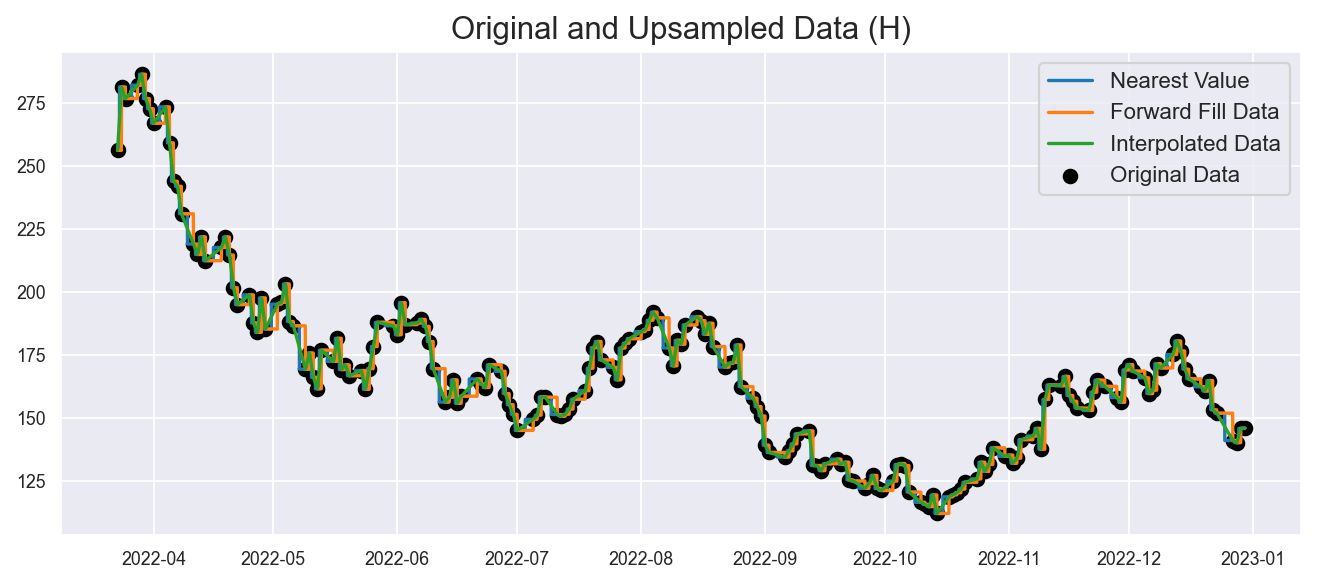

In [17]:
# Upsample and fill missing values with a given value
df_upsample["nearest_value"] = df_time_subset.resample(upsample).fillna("nearest")
# Upsample and fill missing values with a forward fill
df_upsample["forward_fill"] = df_time_subset.resample(upsample).ffill()
# Upsample and fill missing values with interpolation
df_upsample["interpolate"] = df_time_subset.resample(upsample).interpolate()
# Plot the original data and three of the upsampling methods
plt.scatter(df_upsample.index, df_upsample[var_col], label="Original Data", color="black" )
plt.plot(df_upsample.index, df_upsample["nearest_value"], label="Nearest Value")
plt.plot(df_upsample.index, df_upsample["forward_fill"], label="Forward Fill Data")
plt.plot(df_upsample.index, df_upsample["interpolate"], label="Interpolated Data")
# Initialize a legend
plt.legend()
# Set the plot title and format labels
plt.title("Original and Upsampled Data " + f"({upsample})", fontsize=14)
plt.xticks(size=8)
plt.yticks(size=8)
# Show the plot
plt.show()